In [1]:
#Cargamos las librerías necesarias para el análisis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [2]:
import glob

# Define the path to your MAT files
mat_files_path = "../data/Francis_data/Francis_data/Baseline_fmri/HC/Habits_08/*.mat"

# Use glob to get a list of all matching MAT files
mat_files = sorted(glob.glob(mat_files_path))

# Get the last 20 MAT files
last_20_files = mat_files[:1]

i=0
file_data = []

for file in last_20_files:
    data = loadmat(file)
    thePoints=data['S']['thePoints'][0][0]  # Asumo que son los puntos por los que pasa el stylus que utiliza el paciente
    Sbuttons=data['S']['Sbuttons'] # ¿A qué se refiere con Sbuttons?
    Ts=data['S']['Ts'][0][0][0] # ¿Qué significa Ts?
    trial=data['S']['trial_cond'][0][0] # ¿Intentos de qué exactamente?
    length=len(Sbuttons[0][0]) 
    rule = Ts[-1]/length # A qué se refiere con rule?
    time = np.transpose(np.arange(start=0, stop=Ts[-1]+rule, step=rule)) #Es un array de time por achivo mat, todos corresponden al mismo intento?
    file_data=[time, thePoints[:,0], thePoints[:,1], trial]
    file_data = np.array([thePoints[:,0], thePoints[:,1]]).T
    # Print the file name
    print(length)

    # __header__ <class 'bytes'>
    # __version__ <class 'str'>
    # __globals__ <class 'list'>
    # S
        #thePoints
        #Sbuttons
        #Ts
        #trial_cond

    # print(data['S']['thePoints'])
    # print(file_data)

    i=i+1


1636


In [3]:
df=pd.DataFrame(file_data)
# df.rename(columns={0: "time", 1: "X", 2: 'Y', 3: 'cond'}, inplace=True)
df.rename(columns={0: "X", 1: "Y"}, inplace=True)
df

,X,Y
0,683,384
1,683,384
2,683,384
3,683,384
4,683,384
...,...,...
1632,315,114
1633,315,114
1634,315,114
1635,315,114


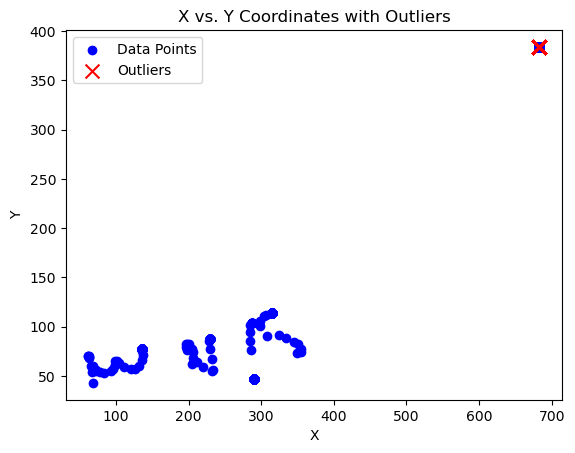

Outliers:
       X    Y  X_ZScore  Y_ZScore
0    683  384  2.011226  2.094934
1    683  384  2.011226  2.094934
2    683  384  2.011226  2.094934
3    683  384  2.011226  2.094934
4    683  384  2.011226  2.094934
..   ...  ...       ...       ...
289  683  384  2.011226  2.094934
290  683  384  2.011226  2.094934
291  683  384  2.011226  2.094934
292  683  384  2.011226  2.094934
293  683  384  2.011226  2.094934

[294 rows x 4 columns]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming you have already imported pandas and created the DataFrame 'df'

# Define a z-score threshold (you can adjust this threshold as needed)
z_score_threshold = 2.0  # Change this to your desired threshold

# Calculate the z-scores for X and Y coordinates
df['X_ZScore'] = np.abs(stats.zscore(df['X']))
df['Y_ZScore'] = np.abs(stats.zscore(df['Y']))

# Identify outliers based on the z-score threshold
outliers_df = df[(df['X_ZScore'] > z_score_threshold) | (df['Y_ZScore'] > z_score_threshold)]

# Create a scatter plot of the original data
plt.scatter(df['X'], df['Y'], label='Data Points', color='blue')

# Create a scatter plot of outliers in a different color
plt.scatter(outliers_df['X'], outliers_df['Y'], label='Outliers', color='red', marker='x', s=100)

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs. Y Coordinates with Outliers')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print the DataFrame containing outliers
print("Outliers:")
print(outliers_df)


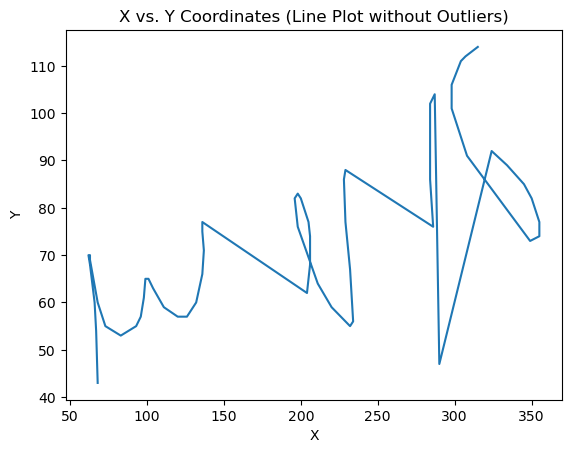

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image
from io import BytesIO


# Define a z-score threshold (you can adjust this threshold as needed)
z_score_threshold = 2.0  # Change this to your desired threshold

# Calculate the z-scores for X and Y coordinates
df['X_ZScore'] = np.abs(stats.zscore(df['X']))
df['Y_ZScore'] = np.abs(stats.zscore(df['Y']))

# Identify outliers based on the z-score threshold
outliers_df = df[(df['X_ZScore'] > z_score_threshold) | (df['Y_ZScore'] > z_score_threshold)]

# Filter the DataFrame to exclude outliers
filtered_df = df[~df.index.isin(outliers_df.index)]

# Create a line plot for the clean data
plt.plot(filtered_df['X'], filtered_df['Y'])

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs. Y Coordinates (Line Plot without Outliers)')

# Show the plot
plt.show()

# # Save the plot as an image
# plt.savefig('clean_data_plot.png')

# # Convert the plot to an image object
# buffer = BytesIO()
# plt.savefig(buffer, format='png')
# buffer.seek(0)
# image = Image.open(buffer)

# # Save the image as a file
# image.save('clean_data_image.png')

In [7]:
import base64
import pickle

# Serialize the clean data and convert it to a base64-encoded string
serialized_data = pickle.dumps(filtered_df)
encoded_data = base64.b64encode(serialized_data).decode('utf-8')

# Create a DataFrame with the encoded data
df = pd.DataFrame({'Clean Data': [encoded_data]})

# # To save the DataFrame to a file (e.g., a CSV file)
# df.to_csv('data_with_clean_coordinates.csv', index=False)

# # To read the DataFrame back from the CSV file
# loaded_df = pd.read_csv('data_with_clean_coordinates.csv')

# Retrieve the encoded data from the loaded DataFrame
encoded_data = df['Clean Data'].iloc[0]

# Decode the data and unpickle it
decoded_data = base64.b64decode(encoded_data.encode('utf-8'))
retrieved_clean_data = pickle.loads(decoded_data)

In [8]:
retrieved_clean_data

,X,Y,X_ZScore,Y_ZScore
294,68,43,1.755607,0.946878
295,67,54,1.761732,0.848755
296,66,60,1.767857,0.795234
297,63,68,1.786232,0.723871
298,62,70,1.792356,0.706031
...,...,...,...,...
1632,315,114,0.242749,0.313539
1633,315,114,0.242749,0.313539
1634,315,114,0.242749,0.313539
1635,315,114,0.242749,0.313539
